<a href="https://colab.research.google.com/github/francosuriano/ML2022/blob/main/Ej_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 6: Modelos de regresión

Caso: Precios de casas en Boston

In [ ]:
# Cargado del dataset

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


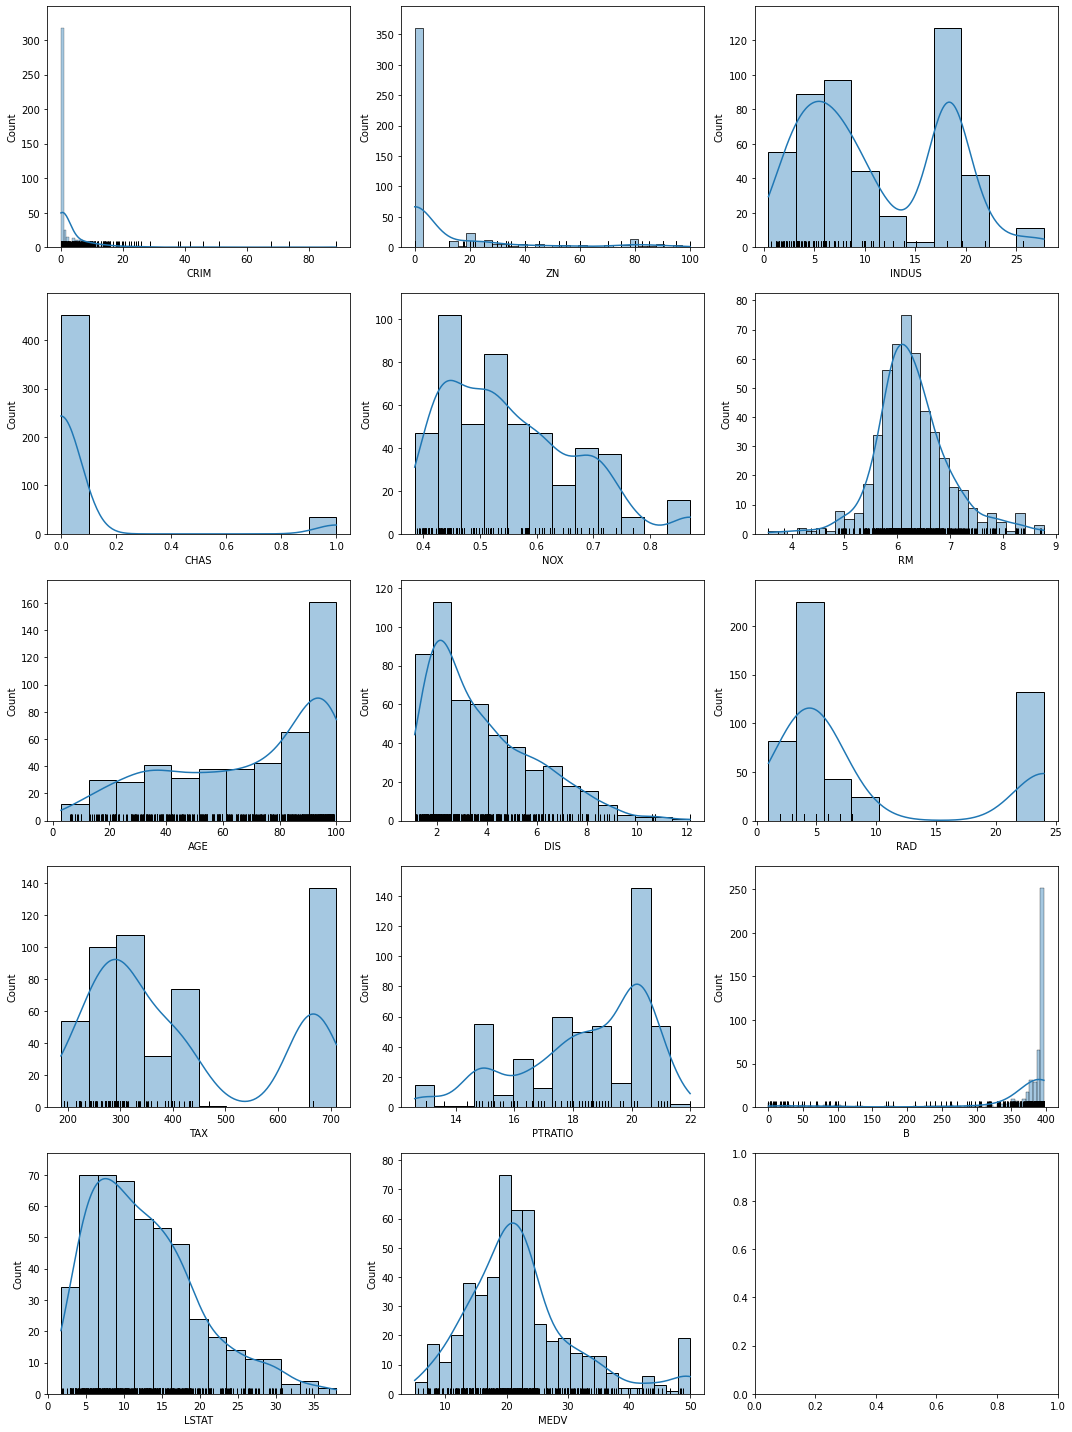

In [ ]:
# Armamos histogramas de distribución para observar los features involucrados

import seaborn as sns
import matplotlib.pyplot as plt

def histo(data, ax): 

    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
   
def distr_datasets(df, fig_alto, fig_ancho): 

    cols = df.columns
    fig, axes = plt.subplots(fig_alto, fig_ancho, figsize=((fig_ancho*25)//5, (fig_alto*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        histo(df[col_name], ax)

    fig.tight_layout()
    plt.show()

features = ['CRIM',	'ZN',	'INDUS',	'CHAS'	,'NOX'	,'RM'	,'AGE', 'DIS',	'RAD',	'TAX',	'PTRATIO',	'B', 'LSTAT',	'MEDV']
distr_datasets(df[features],5,3)

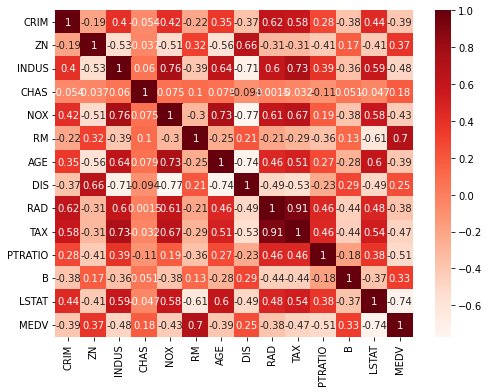

In [ ]:
# Hacemos también un mapa de correlación

corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

In [ ]:
# Observamos si existen valores 'Null' en el dataset: 

print(df.isnull().sum())
print('-------------------------')
print(df.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
-------------------------
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# Luego, quitamos dichos valores para evitar problemas:

df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Separamos el dataset en features y target

X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [ ]:
# Separamos el dataset en datos de entrenamiento y testeo:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Preprocesamiento: Escalado de datos:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

1) Modelo de Regresión Lineal:


Creación y entrenamiento:

In [ ]:
# Modelo de regresión

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

Testeo y evaluación del modelo:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Evaluación del modelo para conjunto de entrenamiento

y_train_predict = lm.predict(X_train_scaled)
rmse_1a = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_1a = r2_score(y_train, y_train_predict)

print("Performance del modelo con conjunto de entrenamiento: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_1a))
print('R2 score = {}'.format(r2_1a))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test_scaled)
rmse_1b = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_1b = r2_score(y_test, y_test_predict)

print("Performance del modelo con conjunto de testeo: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_1b))
print('R2 score = {}'.format(r2_1b))

Performance del modelo con conjunto de entrenamiento: 
--------------------------------------
RMSE = 4.1416758891563505
R2 score = 0.7695554207424576


Performance del modelo con conjunto de testeo: 
--------------------------------------
RMSE = 5.515452302144615
R2 score = 0.7040205815310641


2) Modelo Regresión Bayesiana (Ridge):

Creación y entrenamiento:

In [ ]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train_scaled, y_train)


BayesianRidge()

Testeo y evaluación del modelo:

In [ ]:
# Evaluación del modelo para conjunto de entrenamiento

y_train_predict = reg.predict(X_train_scaled)
rmse_2a = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_2a = r2_score(y_train, y_train_predict)

print("Performance del modelo con conjunto de entrenamiento: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_2a))
print('R2 score = {}'.format(r2_2a))
print("\n")

# model evaluation for testing set
y_test_predict = reg.predict(X_test_scaled)
rmse_2b = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_2b = r2_score(y_test, y_test_predict)

print("Performance del modelo con conjunto de testeo: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_2b))
print('R2 score = {}'.format(r2_2b))

Performance del modelo con conjunto de entrenamiento: 
--------------------------------------
RMSE = 4.143255370543017
R2 score = 0.769379621216795


Performance del modelo con conjunto de testeo: 
--------------------------------------
RMSE = 5.52814605465994
R2 score = 0.702656627051328


3) Modelo SVR: Support Vector Regression:

Creación y entrenamiento:

In [ ]:
from sklearn.svm import SVR

SVR_model = SVR()
SVR_model.fit(X_train_scaled,y_train)

SVR()

Testeo y evaluación del modelo:

In [ ]:
# Evaluación del modelo para conjunto de entrenamiento

y_train_predict = SVR_model.predict(X_train_scaled)
rmse_3a = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_3a = r2_score(y_train, y_train_predict)

print("Performance del modelo con conjunto de entrenamiento: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_3a))
print('R2 score = {}'.format(r2_3a))
print("\n")

# model evaluation for testing set
y_test_predict = SVR_model.predict(X_test_scaled)
rmse_3b = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_3b = r2_score(y_test, y_test_predict)

print("Performance del modelo con conjunto de testeo: ")
print("--------------------------------------")
print('RMSE = {}'.format(rmse_3b))
print('R2 score = {}'.format(r2_3b))

Performance del modelo con conjunto de entrenamiento: 
--------------------------------------
RMSE = 4.640471568269559
R2 score = 0.7107066108120985


Performance del modelo con conjunto de testeo: 
--------------------------------------
RMSE = 7.054638994947992
R2 score = 0.5157731851587722


Por último, comparamos los métodos utilizados para ver cual dio mejores resultados en el caso de análisis:

                RSME vs Modelo


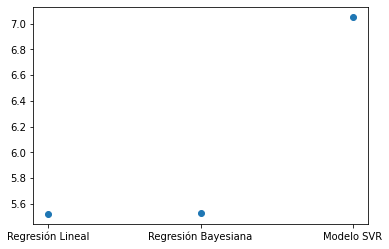

      --------------------------------------------
                R2 vs Modelo


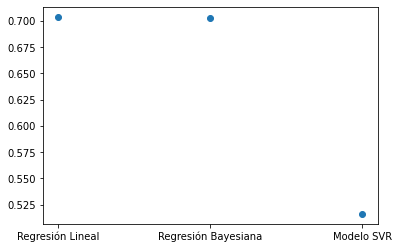

In [ ]:
rmse = [rmse_1b, rmse_2b, rmse_3b]
r2 = [r2_1b, r2_2b, r2_3b]

print('                RSME vs Modelo')
x = ['Regresión Lineal', 'Regresión Bayesiana', 'Modelo SVR']
plt.scatter(x,rmse)
plt.show()

print('      --------------------------------------------')

print('                R2 vs Modelo')
x = ['Regresión Lineal', 'Regresión Bayesiana', 'Modelo SVR']
plt.scatter(x,r2)
plt.show()


Observamos que el mayor error ocurre para el modelo SVR, mientras que los modelos de regresión lineal y regresión bayesiana poseen menor error cuadrático. 

Por otro lado, el valor de correlación R2 resulta más alto (y casi idéntico entre si) para los modelos de regresión lineal y regresión bayesiana. Además, el modelo SVR es el que peor R2 proporciona. 

Por lo tanto, tanto un modelo de regresión lineal como uno de regresión bayesiana resultan bien para el caso de análisis. 